In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open("names.txt", "r").read().splitlines()

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

In [6]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [7]:
# Bi-gram dictionary
dict = {}
for w in words:
    w = ["<S>"] + list(w) + ["<E>"]
    for i in range(len(w)-1):
        pair = (w[i], w[i+1])
        if pair in dict.keys():
            dict[pair] += 1
        else:
            dict[pair] = 1

In [8]:
# Sorted in descending
sorted(dict.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [9]:
# Bi-gram table
char = sorted(list(set(''.join(words)))) # alphabets 
stoi = {}
for i,s in enumerate(char):
    stoi[s] = i+1
stoi["."] = 0
print(stoi)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [10]:
N = torch.zeros((27,27), dtype=torch.int32)

In [11]:
for w in words:
    w = ["."] + list(w) + ["."]
    for i in range(len(w)-1):
        pair = (w[i], w[i+1])
        ix1 = stoi[w[i]]
        ix2 = stoi[w[i+1]]
        N[ix1, ix2] += 1     

In [12]:
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

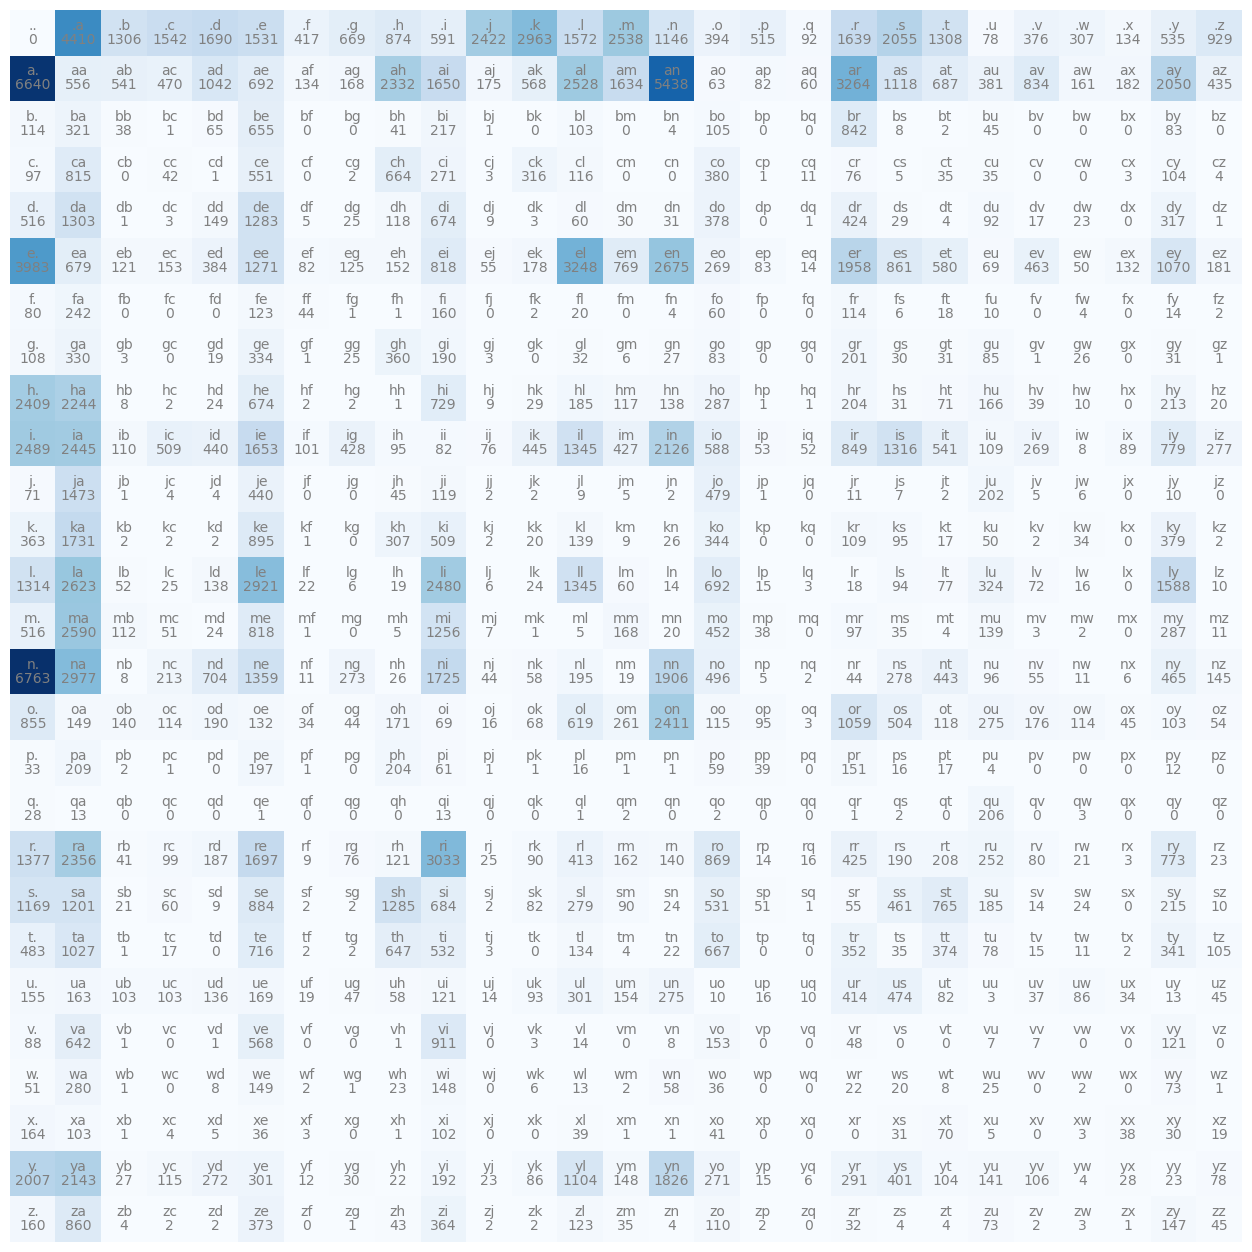

In [13]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [14]:
# Normalize
g = torch.Generator().manual_seed(2147483647)

In [15]:
# create probability row for the given row
P = N.float()
P = P/P.sum(axis=1, keepdim=True)
P.shape

torch.Size([27, 27])

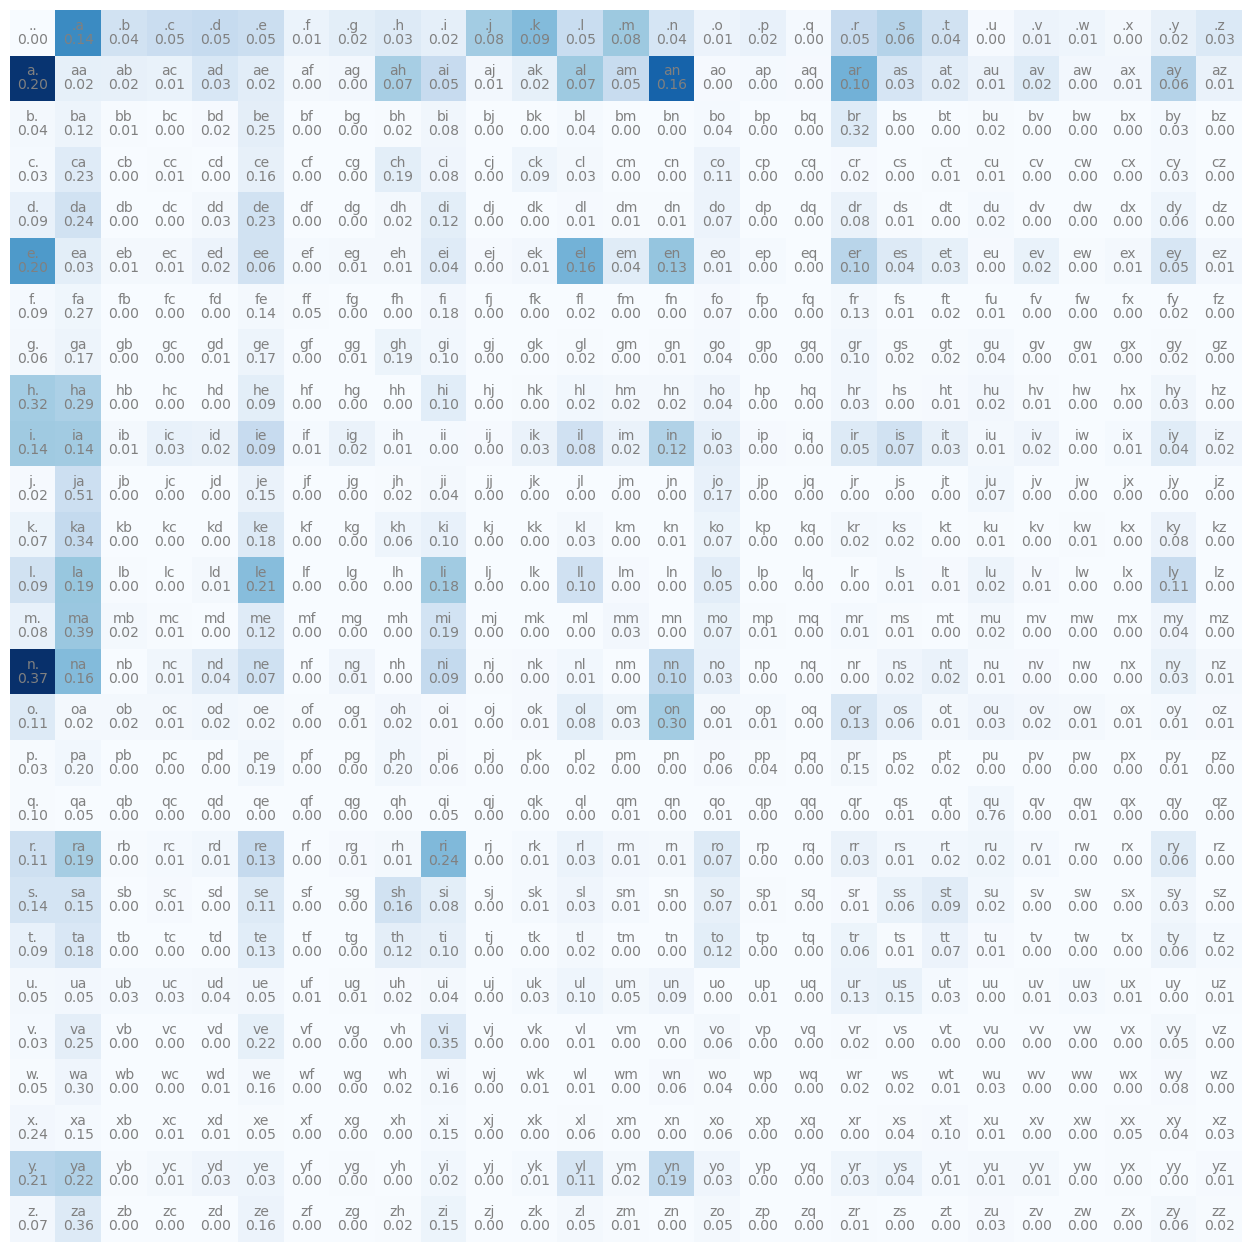

In [16]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, f"{P[i, j].item():.2f}", ha="center", va="top", color='gray')
plt.axis('off');

In [17]:
P.sum(axis=1, keepdim=False).shape

torch.Size([27])

In [18]:

# Go the first row, where characters start, .char
# randomly pick with random given the probability
# first char of word found
# go to the row of that first char, and pick with random probability
# continue

output = []
for i in range(10):
    out = []
    ix = 0 
    while True:
        row = P[ix]
        # Pick randomly from that row
        ix = torch.multinomial(row, num_samples=1, replacement=True, generator=g).item()
        
        # add to word
        out.append(itos[ix])

        # if Row reaches . row, end of word
        if ix==0:
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.


In [19]:
import torch.nn.functional as F

xs, ys = [], []

for w in words[:10]:
    w = ["."] + list(w) + ["."]
    for i in range(len(w)-1):
        pair = (w[i], w[i+1])
        ix1 = stoi[w[i]]
        ix2 = stoi[w[i+1]]
        #print(w[i], w[i+1])
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [20]:
xs

tensor([ 0,  5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9,
        19,  1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0,  3,  8,  1,
        18, 12, 15, 20, 20,  5,  0, 13,  9,  1,  0,  1, 13,  5, 12,  9,  1,  0,
         8,  1, 18, 16,  5, 18,  0,  5, 22,  5, 12, 25, 14])

In [21]:
ys

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0,  3,  8,  1, 18,
        12, 15, 20, 20,  5,  0, 13,  9,  1,  0,  1, 13,  5, 12,  9,  1,  0,  8,
         1, 18, 16,  5, 18,  0,  5, 22,  5, 12, 25, 14,  0])

In [22]:
# For every letter xs_1, the prediction is ys_1, . e, e m, m m, 
# in terms of index, if 0, next should be 5, if 5 input, output should be 13

In [23]:
### One hot encoding
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
yenc = F.one_hot(ys, num_classes=27).float()

In [24]:
# .emma. to one hot encoding, each tensor's index ix is filled with 1 with rest being 0
# . is at 0 so first row as 1 on the first index, with rest of 26 values being 0
# e is index 5 in stoi so index 5 at row second is 1 with rest 0


In [25]:
print(xenc.shape)
print(yenc.shape)

torch.Size([67, 27])
torch.Size([67, 27])


In [26]:
for i in range(xenc.shape[0]):
    print(xenc[i])
    print(yenc[i])

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [27]:
xenc[0]

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
from micrograd import MLP

In [29]:
nn = MLP(27,[128,64,27])

In [30]:
logits = nn(xenc[0], activation="softmax")

In [31]:
nn.cross_entropy_loss(logits,yenc[0])

Value(data=4.8798651695251465, grad=0.0)

In [32]:
epochs = 10
lr = 0.01
for e in range(epochs):
    total_loss = 0
    for i in range(len(xenc)):
        logits = nn(xenc[i], activation="softmax")
        loss = nn.cross_entropy_loss(logits, yenc[i])
    
        # zero grad
        for p in nn.parameters():
            p.grad = 0.0
        loss.backward()
        
        for p in nn.parameters():
            p.data += -lr * p.grad
        
        total_loss += loss.data
    print("loss:", total_loss/len(xenc))

loss: tensor(3.3569)
loss: tensor(3.1355)
loss: tensor(3.0580)
loss: tensor(2.9991)
loss: tensor(2.9626)
loss: tensor(2.9266)
loss: tensor(2.9031)
loss: tensor(2.8831)
loss: tensor(2.8606)
loss: tensor(2.8382)
